In [1]:
#!pip install seaborn numpy matplotlib phonopy phono3py
import numpy as np
import seaborn as sns
import pandas as pd
#import phono3py as pn

import matplotlib.pylab as plt
from matplotlib import rcParams
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib.lines import Line2D

rcParams.update({'figure.autolayout': True})
sns.set_style("whitegrid", rc={"axes.edgecolor": "k"})
sns.set_style("ticks", {"xtick.major.size":8,"ytick.major.size":8})

sns.set_context("notebook",rc={"grid.linewidth": 0,
                            "font.family":"Helvetica", "axes.labelsize":24.,"xtick.labelsize":24.,
                            "ytick.labelsize":24., "legend.fontsize":20.}) # https://seaborn.pydata.org/tutorial/aesthetics.html

colors = sns.color_palette("bright", 12) #https://seaborn.pydata.org/tutorial/color_palettes.html

display(colors)

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0),
 (0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0)]

In [2]:
# This function determines the k-path length for band structures ######################
# kpoints : a list of the k-points sampled on the k-path. The k-vectors will be determined from this
# POSCAR : the path to the POSCAR file type for this band structure. The simulation cell is taken from this file.
def k_path_dft(kpoints, POSCAR, num_kpts): # poscar is path to output file (./POSCAR)
    kvectors = []
    for i in range(0,len(kpoints)-1):
        vector = [kpoints[i+1][0]-kpoints[i][0], kpoints[i+1][1]-kpoints[i][1], kpoints[i+1][2]-kpoints[i][2]]
        kvectors.append(vector)
   
    simulation_cell = pd.read_csv(POSCAR, header=None, delim_whitespace=True, skiprows=[0,1], nrows=3)
   
    klength = []
    for i in range(0,len(kvectors)): # norm of dot prod of kpoints (to change scale)
        distance = np.linalg.norm(np.dot(kvectors[i], simulation_cell))
        klength.append(np.pi/distance)
       
    kpath = np.linspace(0, np.sum(klength), num_kpts) # num_kpts is total num of kpoints (x per band)
    return kpath
#This function determines the locations of the kvectors in the KPATH vector(generated above)
def location_kpts_dft(kpoints, bands): # input vector of KPOINTS and REFORMATTED_BANDS.dat variable
    num_elem = int(len(bands[:,0])/(len(kpoints)-1)) # equal to the number of pts per vector, 80 in this case
    location_kpts = [0,num_elem-1]
    for i in range(1,len(kpoints)-1):
        location_kpts.append(location_kpts[i]+num_elem)
    return location_kpts

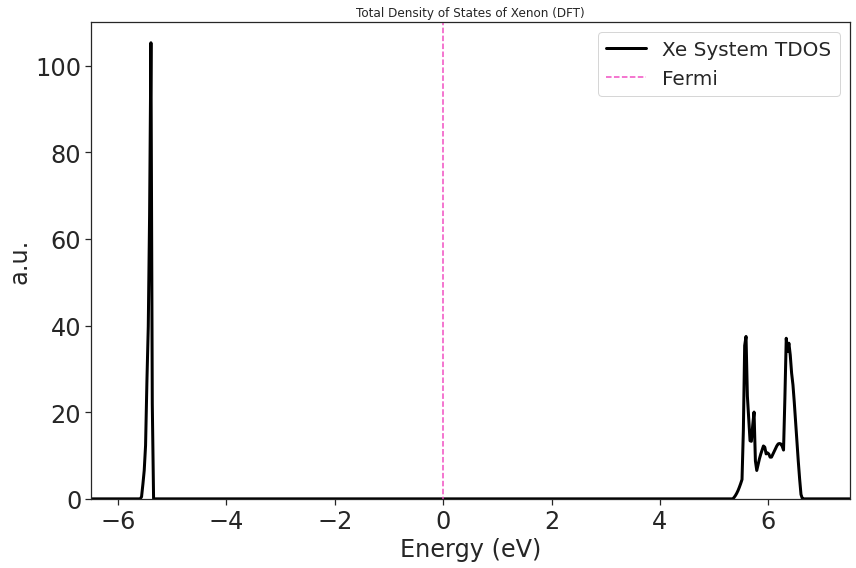

In [3]:
# density of state
# get vals
TDOSDFT = np.array(np.loadtxt('./Xe/DFT/3-DOS/TDOS.dat'))
fermiDFT = (-12.00483 - (-1.27283))/2 + -1.27283 #-6.381170  #set at midpoint between valence and conduction
# plot TDOS
fig1 = plt.figure(figsize=(12,8))
plt.plot(TDOSDFT[:,0]-fermiDFT, TDOSDFT[:,1], color='k',lw=3, label='Xe System TDOS')
plt.vlines(0,-10,110,color=colors[6],linestyle='dashed', label='Fermi')
plt.xlabel('Energy (eV)')
plt.ylabel('a.u.')
plt.xlim(-6.5,7.5)
plt.ylim(-0.1,110)
plt.legend()
plt.title('Total Density of States of Xenon (DFT)')
plt.savefig('./figures/Xe-DOS-DFT.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show()

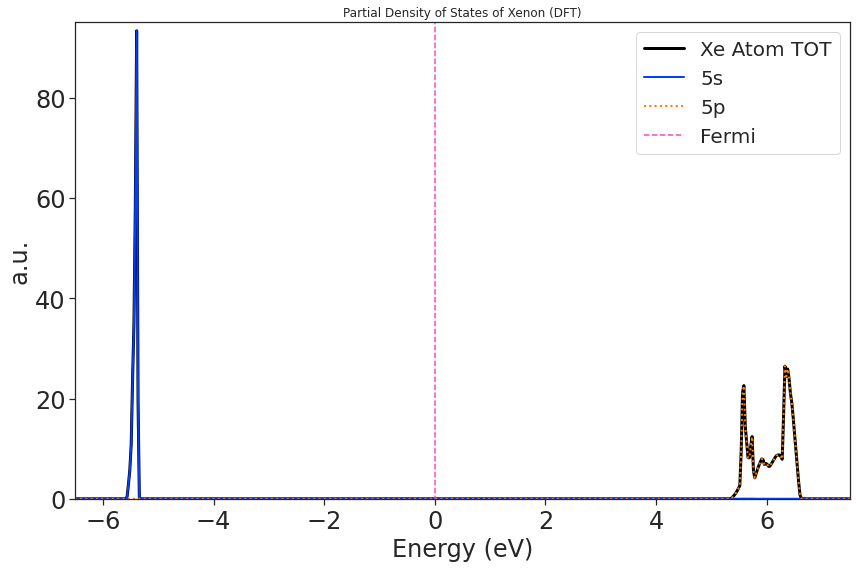

In [4]:
# partial density of state
# get vals
PDOSDFT = np.array(np.loadtxt('./Xe/DFT/3-DOS/PDOS_Xe.dat'))
fermiDFT = (-12.00483 - (-1.27283))/2 + -1.27283 #-6.381170 
# plot PDOS
fig1 = plt.figure(figsize=(12,8))
   #Energy           s          py          pz          px         dxy         dyz         dz2         dxz         dx2       tot  
#plt.plot(TDOSDFT[:,0]-fermiDFT, TDOSDFT[:,1], color='k',lw=3, label='Xe DOS DFT')
plt.plot(PDOSDFT[:,0]-fermiDFT, PDOSDFT[:,10], color='k',lw=3, label='Xe Atom TOT') # about 2/3 of system tot, why?
plt.plot(PDOSDFT[:,0]-fermiDFT, PDOSDFT[:,1], color=colors[0], lw=2, label='5s')
plt.plot(PDOSDFT[:,0]-fermiDFT, PDOSDFT[:,2]+PDOSDFT[:,3]+PDOSDFT[:,4], color=colors[1],linestyle='dotted',lw=2, label='5p')
#plt.plot(PDOSDFT[:,0]-fermiDFT, PDOSDFT[:,5]+PDOSDFT[:,6]+PDOSDFT[:,7]+PDOSDFT[:,8]+PDOSDFT[:,9], color='b',lw=2, label='d') # 0
plt.vlines(0,-10,110,color=colors[6],linestyle='dashed', label='Fermi')
plt.xlabel('Energy (eV)')
plt.ylabel('a.u.')
plt.xlim(-6.5,7.5)
plt.ylim(-0.1,95)
plt.legend()
plt.title('Partial Density of States of Xenon (DFT)')
plt.savefig('./figures/Xe-PDOS-DFT.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show()

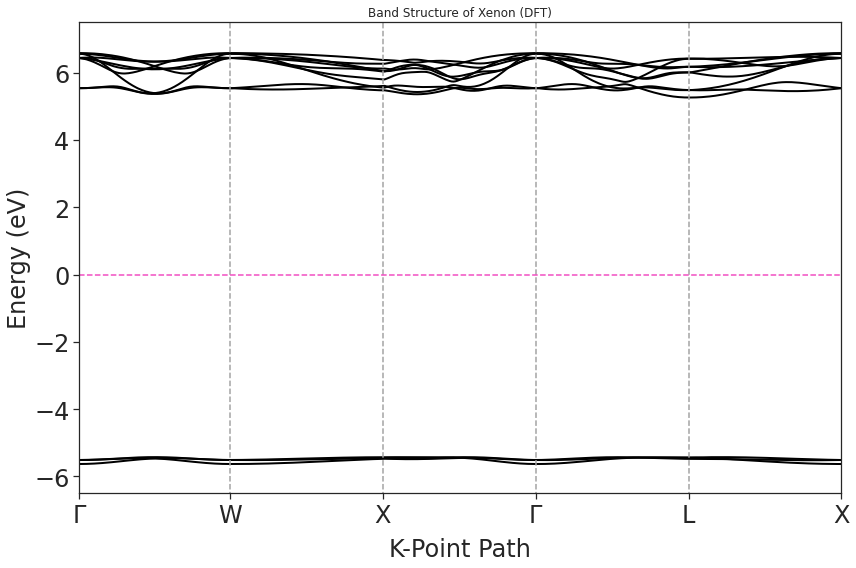

In [5]:
KPOINTS = [[0,0,0],[0,1,0],[0.5,0.75,0.25],[0,0,0],[0.5,0.5,0.5],[0,1,0]] # copied from KPOINTS

fermiDFT = (-12.00483 - (-1.27283))/2 + -1.27283 #-6.381170 
BANDS_DFT = np.array(np.loadtxt("./Xe/DFT/4-BS/REFORMATTED_BAND.dat")) # update this 
KPATH_DFT = k_path_dft(KPOINTS, "./Xe/DFT/4-BS/POSCAR",len(BANDS_DFT[:,0])) # update this to be my poscar
# bilbalo chrystallogrphic server, symmetry, kvec, choose sym for struct, #227 Fd-3m, kvectors ##############
#print('shape', np.shape(Bands_Xe_DFT)) 

############# v plot Band Struct
fig3 = plt.figure(figsize=(12,8))
plt.plot(KPATH_DFT, BANDS_DFT[:,1:-1]-fermiDFT, color='k', lw=2)#, label='Xe_BS_DFT') # use first column of reformatted bands to be x vals =

kpts = KPATH_DFT[location_kpts_dft(KPOINTS, BANDS_DFT)] # generate kpts using a function instead of manual inputs
plt.xticks(kpts,['\u0393','W','X','\u0393','L','X'])
plt.vlines(kpts[1:5],-20,20,color=colors[7],linestyle='dashed')
plt.hlines(0,KPATH_DFT[0],KPATH_DFT[-1],color=colors[6],linestyle='dashed')
plt.xlabel('K-Point Path', labelpad = 10)
plt.ylabel('Energy (eV)', labelpad = 3)
plt.xlim(KPATH_DFT[0],KPATH_DFT[-1])
plt.ylim(-6.5,7.5)
plt.title('Band Structure of Xenon (DFT)')
plt.savefig('./figures/Xe-BS-DFT.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show()

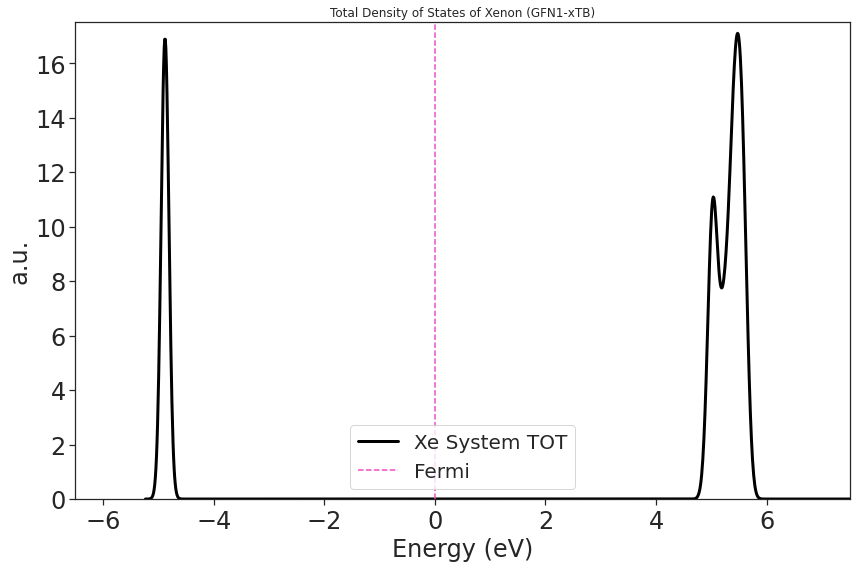

In [40]:

# density of state Xe using GFN-xTB
# get vals
TDOSGFN1 = np.array(np.loadtxt('./Xe/GFN1/3-DOS/dos_tot.dat'))
fermiGFN1 =  (-12.6 - (-21.65))/2 + -21.65 # midway between peaks
# plot TDOS
fig1 = plt.figure(figsize=(12,8))
plt.plot(TDOSGFN1[:,0]-fermiGFN1, TDOSGFN1[:,1], color='k',lw=3, label='Xe System TOT')
#plt.plot(TDOS[:,0], TDOS[:,2], color='grey',lw=2, label='UO2_TOT_DW') # not necessary because UO2 is a semiconductor (not magnetic, symmetrical)
plt.vlines(0,0,20,color=colors[6],linestyle='dashed', label='Fermi') # fermi NOT SHIFTED
#plt.xlim(-8,6) # fermi NOT SHIFTED

plt.xlabel('Energy (eV)')
plt.ylabel('a.u.')
plt.ylim(-0.01,17.5)
plt.xlim(-6.5,7.5)
plt.legend()
plt.title('Total Density of States of Xenon (GFN1-xTB)')
plt.savefig('./figures/Xe-DOS-GFN1.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show()

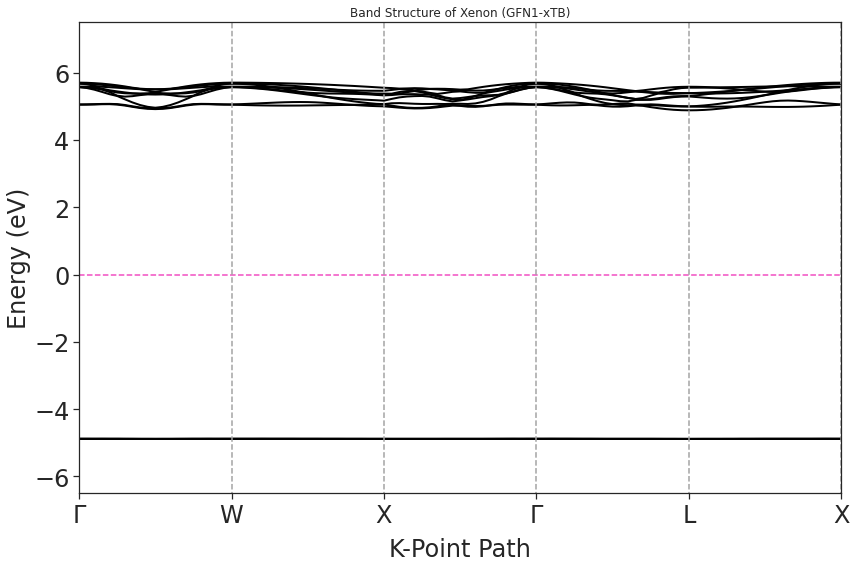

In [70]:
# band structure
# GFN1
KPOINTS = [[0,0,0],[0,1,0],[0.5,0.75,0.25],[0,0,0],[0.5,0.5,0.5],[0,1,0]] # copied from KPOINTS

fermiGFN1 =  (-12.6 - (-21.65))/2 + -21.65 # midway between peaks
BANDS_GFN1 = np.array(np.loadtxt("./Xe/GFN1/4-BS/bands_tot.dat")) # update this ho
KPATH_GFN1 = k_path_dft(KPOINTS, "./Xe/GFN1/4-BS/POSCAR",len(KPOINTS)) # update this to be my poscar
# bilbalo chrystallogrphic server, symmetry, kvec, choose sym for struct, #227 Fd-3m, kvectors ##############3
#print('shape', np.shape(Bands_Xe_DFT))
#print(KPATH_Xe_DFT)

############# v plot BS
fig3 = plt.figure(figsize=(12,8))
plt.title('Band Structure of Xenon (GFN1-xTB)')
plt.plot(BANDS_GFN1[:,0], BANDS_GFN1[:,1:-1]-fermiGFN1, color='k', lw=2) # use first column of reformatted bands to be x vals 
plt.hlines(0,BANDS_GFN1[0,0],BANDS_GFN1[-1,0],color=colors[6],linestyle='dashed')
plt.xlim(BANDS_GFN1[0,0],BANDS_GFN1[-1,0])
plt.ylim(-6.5,7.5)
plt.xlabel('K-Point Path', labelpad = 10)
plt.ylabel('Energy (eV)', labelpad = 3)
# location of kpts from dataset
kpts=[BANDS_GFN1[0,0],BANDS_GFN1[20,0],BANDS_GFN1[40,0],BANDS_GFN1[60,0],BANDS_GFN1[80,0],BANDS_GFN1[100,0]]
plt.xticks(kpts,['\u0393','W','X','\u0393','L','X'])
plt.vlines(kpts[1:6],-18,18,color=colors[7],linestyle='dashed')
plt.savefig('./figures/Xe-BS-GFN1.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show()

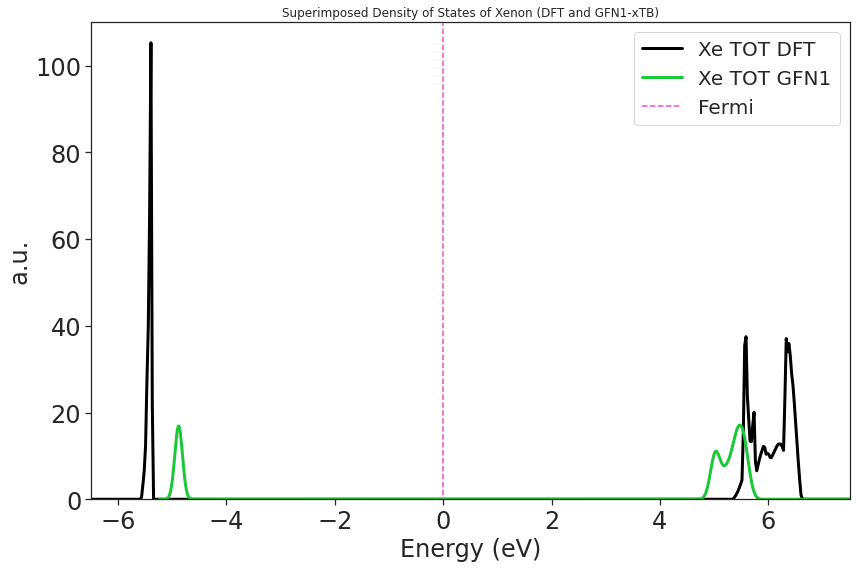

In [8]:
# Superimpose Xe Plots
# get vals
PDOSDFT = np.array(np.loadtxt('./Xe/DFT/3-DOS/PDOS_Xe.dat'))
TDOSDFT = np.array(np.loadtxt('./Xe/DFT/3-DOS/TDOS.dat'))
TDOSGFN1 = np.array(np.loadtxt('./Xe/GFN1/3-DOS/dos_tot.dat'))
#Set fermi to midway between bands
#print(TDOSDFT) # low: 1.317000e-02 high: 6.171170e+00 
#print(TDOSGFN1) # low: -1.10500000e+01 high: -4.18000000e+00
fermiDFT = (-12.00483 - (-1.27283))/2 + -1.27283 #-6.63883
fermiGFN1 = (-12.6 - (-21.65))/2 + -21.65  #-17.125 #eV 
# plot TDOS
fig1 = plt.figure(figsize=(12,8))
plt.plot(TDOSDFT[:,0]-fermiDFT, TDOSDFT[:,1], color='k',lw=3, label='Xe TOT DFT')
#plt.plot(PDOSDFT[:,0]-fermiDFT, PDOSDFT[:,1], color=colors[0], lw=2, label='5s')
#plt.plot(PDOSDFT[:,0]-fermiDFT, PDOSDFT[:,2]+PDOSDFT[:,3]+PDOSDFT[:,4], color=colors[1],linestyle='dotted',lw=2, label='5p')

plt.plot(TDOSGFN1[:,0]-fermiGFN1, TDOSGFN1[:,1], color=colors[2],lw=3, label='Xe TOT GFN1')
plt.vlines(0,-10,110,color=colors[6],linestyle='dashed', label='Fermi')
#plt.vlines(fermiDFT-fermiDFT,-10,110,color='magenta',linestyle='dashed', label='Fermi DFT')
plt.xlabel('Energy (eV)')
plt.ylabel('a.u.')
plt.ylim(-0.01,110)
plt.xlim(-6.5,7.5)
plt.legend()
plt.title('Superimposed Density of States of Xenon (DFT and GFN1-xTB)')
plt.savefig('./figures/Xe-DOS-Superimposed.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show()
np.set_printoptions(threshold=np.inf)

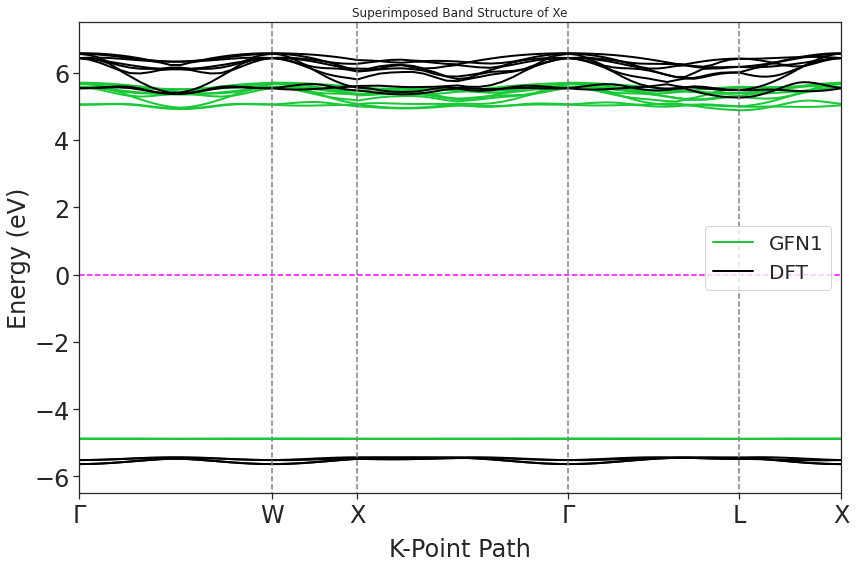

In [117]:
# Superimpose CeO2 BS
KPOINTS = [[0,0,0],[0,1,0],[0.5,0.75,0.25],[0,0,0],[0.5,0.5,0.5],[0,1,0]] # copied from KPOINTS
# get data:
BANDS_DFT = np.array(np.loadtxt("./Xe/DFT/4-BS/REFORMATTED_BAND.dat")) # update this 
KPATH_DFT = k_path_dft(KPOINTS, "./Xe/DFT/4-BS/POSCAR",len(BANDS_DFT[:,0])) # update this to be my poscar
BANDS_GFN1 = np.array(np.loadtxt("./Xe/GFN1/4-BS/bands_tot.dat")) # update this ho
KPATH_GFN1 = k_path_dft(KPOINTS, "./Xe/GFN1/4-BS/POSCAR",len(BANDS_GFN1[:,0])) # update this to be my poscar

# fermis these are wrong **
fermiDFT = (-12.00483 - (-1.27283))/2 + -1.27283 #-6.63883
fermiGFN1 = (-12.6 - (-21.65))/2 + -21.65  #-17.125 #eV 


############# v plot BS
fig3 = plt.figure(figsize=(12,8))

########### gfn-xtb

# ASK MASOUMEH ABOUT THIS
#for i in range(1,len(Bands_Xe_GFN1[0,1:])):    
#    fig3 = plt.plot(Bands_Xe_GFN1[:,0], Bands_Xe_GFN1[:,i]-fermiGFN, color='b')
plt.plot(BANDS_DFT[:,0], (BANDS_GFN1[0:-1,1])-fermiGFN1, color=colors[2], lw=2, label='GFN1') # use first column of reformatted bands to be x vals 
plt.plot(BANDS_DFT[:,0], (BANDS_GFN1[0:-1,1:-1])-fermiGFN1, color=colors[2], lw=2) # use first column of reformatted bands to be x vals 

############# dft
plt.plot(BANDS_DFT[:,0], BANDS_DFT[:,1]-fermiDFT, color='k', lw=2, label='DFT')#, label='Xe_BS_DFT') # use first column of reformatted bands to be x vals =
plt.plot(BANDS_DFT[:,0], BANDS_DFT[:,1:-1]-fermiDFT, color='k', lw=2)
kpts=[BANDS_DFT[0,0],BANDS_DFT[19,0],BANDS_DFT[39,0],BANDS_DFT[59,0],BANDS_DFT[79,0],BANDS_DFT[99,0]]# location of kpts from dataset

plt.xticks(kpts,['\u0393','W','X','\u0393','L','X'])
plt.vlines(kpts[1:5],-20,20,color='grey',linestyle='dashed')
plt.hlines(0, BANDS_DFT[0,0],BANDS_DFT[99,0],color='magenta',linestyle='dashed')
plt.xlabel('K-Point Path', labelpad = 10)
plt.ylabel('Energy (eV)', labelpad = 3)
plt.xlim(BANDS_DFT[0,0],BANDS_DFT[99,0])
plt.ylim(-6.5,7.5)
plt.legend()
plt.title('Superimposed Band Structure of Xe')

plt.show()

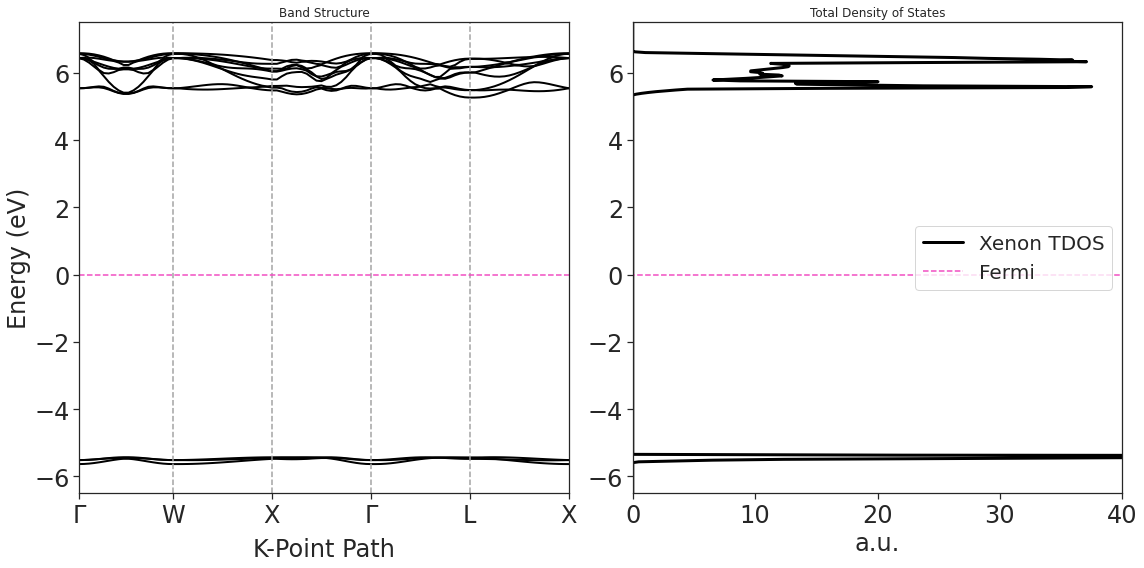

<Figure size 432x288 with 0 Axes>

In [118]:
# All in one (DOS+BS)
TDOS_DFT = np.array(np.loadtxt('./Xe/DFT/3-DOS/TDOS.dat'))
BANDS_DFT = np.array(np.loadtxt("./Xe/DFT/4-BS/REFORMATTED_BAND.dat")) # update this 
KPATH_DFT = k_path_dft(KPOINTS, "./Xe/DFT/4-BS/POSCAR",len(BANDS_DFT[:,0])) # update this to be my poscar
KPOINTS = [[0,0,0],[0,1,0],[0.5,0.75,0.25],[0,0,0],[0.5,0.5,0.5],[0,1,0]] # copied from KPOINTS
fermiDFT = (-12.00483 - (-1.27283))/2 + -1.27283 # midway between peaks

fig5 = plt.figure(figsize=(16,8))

# plot Band Struct
bs = plt.subplot(121)
kpts = KPATH_DFT[location_kpts_dft(KPOINTS, BANDS_DFT)] # generate kpts using a function instead of manual inputs

plt.plot(KPATH_DFT, BANDS_DFT[:,1:-1]-fermiDFT, color='k', lw=2)#, label='Xe_BS_DFT') # use first column of reformatted bands to be x vals =
plt.xticks(kpts,['\u0393','W','X','\u0393','L','X'])
plt.vlines(kpts[1:5],-6.5,7.5,color=colors[7],linestyle='dashed')
plt.hlines(0,KPATH_DFT[0],KPATH_DFT[-1],color=colors[6],linestyle='dashed')
plt.xlabel('K-Point Path', labelpad = 10)
plt.ylabel('Energy (eV)', labelpad = 3)
plt.xlim(KPATH_DFT[0],KPATH_DFT[-1])
plt.ylim(-6.5,7.5)
plt.title('Band Structure')

# plot TDOS
dos = plt.subplot(122)
plt.plot(TDOS_DFT[:,1], TDOS_DFT[:,0]-fermiDFT, color='k',lw=3, label='Xenon TDOS')
plt.hlines(0,-10,110,color=colors[6],linestyle='dashed', label='Fermi')
#plt.ylabel('Energy (eV)')
plt.xlabel('a.u.')
plt.ylim(-6.5,7.5)
plt.xlim(-0.01,40)
plt.legend()
plt.title('Total Density of States')

plt.show()
plt.savefig('./figures/Xe-ALL-DFT.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)


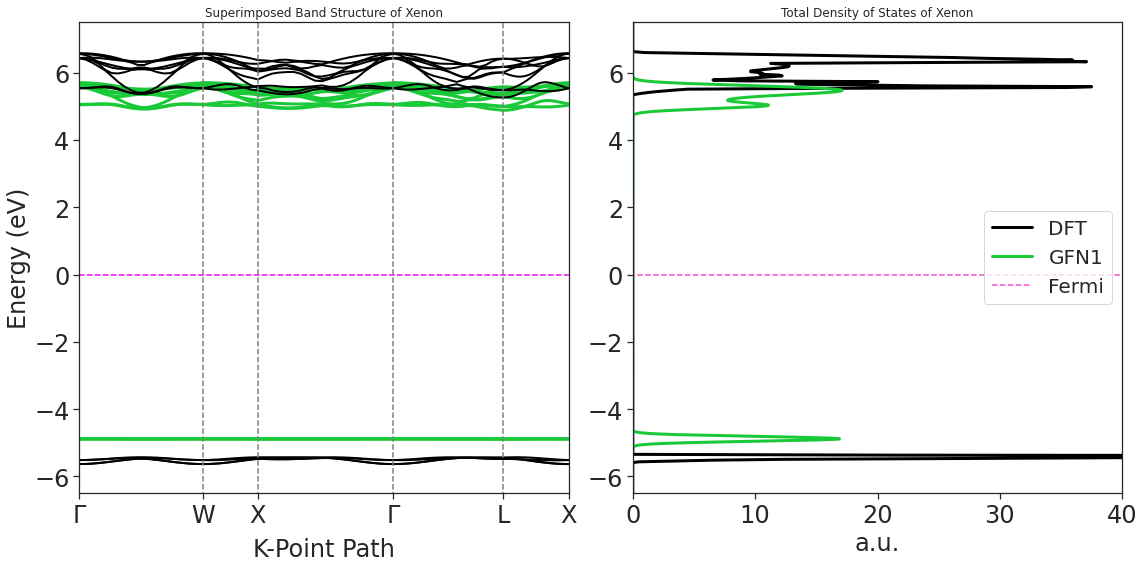

<Figure size 432x288 with 0 Axes>

In [123]:
# All and Superimposed
# All in one (DOS+BS)
KPOINTS = [[0,0,0],[0,1,0],[0.5,0.75,0.25],[0,0,0],[0.5,0.5,0.5],[0,1,0]] # copied from KPOINTS
fig6 = plt.figure(figsize=(16,8))

# plot Band Struct
bs = plt.subplot(121)
# get data:
BANDS_DFT = np.array(np.loadtxt("./Xe/DFT/4-BS/REFORMATTED_BAND.dat")) # update this 
KPATH_DFT = k_path_dft(KPOINTS, "./Xe/DFT/4-BS/POSCAR",len(BANDS_DFT[:,0])) # update this to be my poscar
BANDS_GFN1 = np.array(np.loadtxt("./Xe/GFN1/4-BS/bands_tot.dat")) # update this ho
KPATH_GFN1 = k_path_dft(KPOINTS, "./Xe/GFN1/4-BS/POSCAR",len(BANDS_GFN1[:,0])) # update this to be my poscar

# fermis these are wrong **
fermiDFT = (-12.00483 - (-1.27283))/2 + -1.27283 #-6.63883
fermiGFN1 = (-12.6 - (-21.65))/2 + -21.65  #-17.125 #eV 


############# v plot BS
########### gfn-xtb

plt.plot(BANDS_DFT[:,0], (BANDS_GFN1[0:-1,1])-fermiGFN1, color=colors[2], lw=3) # use first column of reformatted bands to be x vals 
plt.plot(BANDS_DFT[:,0], (BANDS_GFN1[0:-1,1:-1])-fermiGFN1, color=colors[2], lw=3) # use first column of reformatted bands to be x vals 

############# dft
plt.plot(BANDS_DFT[:,0], BANDS_DFT[:,1]-fermiDFT, color='k', lw=2)#, label='Xe_BS_DFT') # use first column of reformatted bands to be x vals =
plt.plot(BANDS_DFT[:,0], BANDS_DFT[:,1:-1]-fermiDFT, color='k', lw=2)
kpts=[BANDS_DFT[0,0],BANDS_DFT[19,0],BANDS_DFT[39,0],BANDS_DFT[59,0],BANDS_DFT[79,0],BANDS_DFT[99,0]]# location of kpts from dataset

plt.xticks(kpts,['\u0393','W','X','\u0393','L','X'])
plt.vlines(kpts[1:5],-20,20,color='grey',linestyle='dashed')
plt.hlines(0, BANDS_DFT[0,0],BANDS_DFT[99,0],color='magenta',linestyle='dashed')
plt.xlabel('K-Point Path', labelpad = 10)
plt.ylabel('Energy (eV)', labelpad = 3)
plt.xlim(BANDS_DFT[0,0],BANDS_DFT[99,0])
plt.ylim(-6.5,7.5)
#plt.legend()
plt.title('Superimposed Band Structure of Xenon')

# plot TDOS
dos = plt.subplot(122)
TDOSDFT = np.array(np.loadtxt('./Xe/DFT/3-DOS/TDOS.dat'))
TDOSGFN1 = np.array(np.loadtxt('./Xe/GFN1/3-DOS/dos_tot.dat'))
plt.plot(TDOS_DFT[:,1], TDOS_DFT[:,0]-fermiDFT, color='k',lw=3, label='DFT')
plt.plot( TDOSGFN1[:,1], TDOSGFN1[:,0]-fermiGFN1,color=colors[2],lw=3, label='GFN1')
plt.hlines(0,-10,110,color=colors[6],linestyle='dashed', label='Fermi')
#plt.ylabel('Energy (eV)')
plt.xlabel('a.u.')
plt.ylim(-6.5,7.5)
plt.xlim(-0.01,40)
plt.legend()
plt.title('Total Density of States of Xenon')

plt.show()
plt.savefig('./figures/Xe-ALL-Superimposed.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)

Old Code. will move to another file later

In [ ]:
# Plot KPTS Optimization, 3x3x3 looks ok
# 1,2,3,4,5,
# 1st iter (wrong IBRION) 3.97425098,-0.11646243,-0.05045030,-0.06080354,-0.06080357
# 2nd iter 1.53014443,-0.15777508,-0.06018758,-0.07302824,
KPTS = [1,2,3,4,5] # num KPTS in test, should be 8 tests to plot
TOTEN_KPTS = [1.53014443,-0.15777508,-0.06018758,-0.07302824,-0.06080357] # eV
plt.plot(KPTS,TOTEN_KPTS, color='k') 
plt.xlim(1,5)
#plt.ylim(-123.34528209,-123.39989459)
plt.xlabel('Num KPTS', labelpad = 10)
plt.ylabel('TOTEN (eV)', labelpad = 3)
plt.title('KPTS Optimization')

In [ ]:
# OLD VER OF BAND STRUCTURE PLOT DO NOT USE
#### band structure
# 
KPOINTS = [[0,0,0],[0,1,0],[0.5,0.75,0.25],[0,0,0],[0.5,0.5,0.5],[0,1,0]] # copied from KPOINTS

fermiDFT = (6.19617 - (-0.01083))/2 + -0.01083 #
BANDS_DFT = np.array(np.loadtxt("./Xe/DFT/4-BS/REFORMATTED_BAND.dat")) # update this 
KPATH_DFT = k_path_dft(KPOINTS, "./Xe/DFT/4-BS/POSCAR",len(BANDS_DFT[:,0])) # update this to be my poscar
# bilbalo chrystallogrphic server, symmetry, kvec, choose sym for struct, #227 Fd-3m, kvectors ##############
#print('shape', np.shape(Bands_Xe_DFT)) 

############# v plot BS
fig3 = plt.figure(figsize=(12,8))
plt.plot(BANDS_DFT[:,0], BANDS_DFT[:,1:-1]-fermiDFT, color='grey', lw=2)#, label='Xe_BS_DFT') # use first column of reformatted bands to be x vals =
kpts=[BANDS_DFT[0,0],BANDS_DFT[79,0],BANDS_DFT[159,0],BANDS_DFT[239,0],BANDS_DFT[319,0],BANDS_DFT[399,0]]# location of kpts from dataset
plt.xticks(kpts,['\u0393','W','X','\u0393','L','X'])
plt.vlines(kpts[1:5],-20,20,color='red',linestyle='dashed')
plt.xlabel('K-Point Path', labelpad = 10)
plt.ylabel('Energy (eV)', labelpad = 3)
plt.xlim(Bands_Xe_DFT[0,0],Bands_Xe_DFT[399,0])
#plt.ylim(-0,30)
#plt.legend()
plt.title('Superimposed BS of Xe')
################### v DOS plot
#plt.subplot(122)
#plt.plot(DOS_AA_DFT[:,1]/5, DOS_AA_DFT[:,0]-(BandGap_AA_DFT/2), color='purple')
#plt.text(2, -0.25, f'{COF_AA}-DFT = {BandGap_AA_DFT} eV', color='purple', fontsize=16)
#plt.xlabel('DOS', labelpad=10)
#plt.ylim(-2,2)
#plt.xlim(0,60)
#plt.hlines(ConductionBand_AA_DFT-(BandGap_AA_DFT/2),0,80,color='purple',linestyle='dashed')
#plt.hlines(ValenceBand_AA_DFT-(BandGap_AA_DFT/2),0,80,color='purple',linestyle='dashed')

plt.savefig('./figures/Xe-BS-DFT.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show()

# to plot in reciprocal space go up to end of first vector, then add last term of first vector to all of second vector, then last term of second vector to third
#
#